### init

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from utils.data_util import HackerNewsContext
from utils.nn_util import EmbeddingsNN
from torch.utils.data import DataLoader

sns.set_theme()
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

g = torch.Generator(device=device).manual_seed(0)

Using mps device


### init hyperparams and data

In [2]:
epochs = 10
batch_size = 512
context_size = 8
embedding_dims = 8
learning_rate = 10**(0.5)
number_of_strings = 50000 # number of strings from input dataset

training_data = HackerNewsContext(train=True, context_size=context_size, number_of_strings=number_of_strings)
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True, drop_last=True)

### find initial learning rate

Text(0, 0.5, 'Negative Log Likelihood')

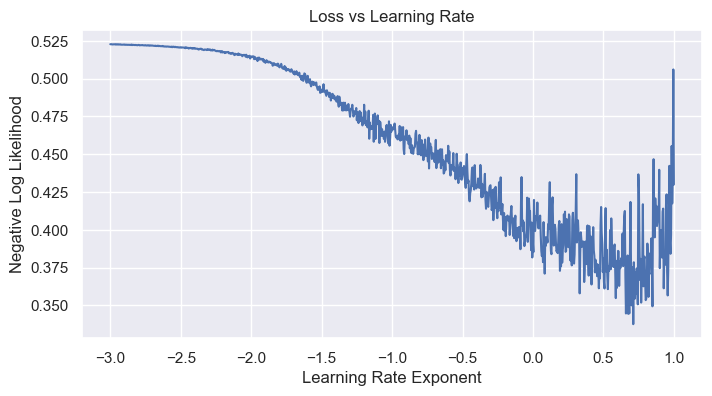

In [3]:
lr_exps = torch.linspace(-3, 1, 1000)
lrs = 10**lr_exps
iterator = iter(train_dataloader)
losses = []
nn1 = EmbeddingsNN(embedding_dims=embedding_dims, context_size=context_size, batch_size=batch_size, device=device)

for lr in lrs:
    X, y = next(iterator)
    X, y = X.to(device), y.to(device) # (batch_size, context_size, 28)

    loss = nn1.forward(X=X, y=y)
    nn1.backward()
    nn1.update_params(lr=lr)
    losses.append(loss)

fig, ax = plt.subplots(figsize=(8,4))
sns.set_style()
plt.plot(lr_exps, np.log10(losses))
ax.set_title('Loss vs Learning Rate')
ax.set_xlabel('Learning Rate Exponent')
ax.set_ylabel('Negative Log Likelihood')

### train neural net

In [4]:
lr = learning_rate
nn2 = EmbeddingsNN(embedding_dims=embedding_dims, context_size=context_size, batch_size=batch_size, device=device)

for epoch in range(epochs):
    losses = []

    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device) # (batch_size, context_size, 28)

        losses.append(nn2.forward(X=X, y=y))
        nn2.backward()
        nn2.update_params(lr=lr)

    # lower learning rate
    if (epochs / (epoch+1) == 2):
        lr /= 2

    print(f'epoch {epoch+1} average loss: {np.mean(losses):.4f}')

epoch 1 average loss: 1.7220
epoch 2 average loss: 1.6617
epoch 3 average loss: 1.6506
epoch 4 average loss: 1.6454
epoch 5 average loss: 1.6420
epoch 6 average loss: 1.5886
epoch 7 average loss: 1.5869
epoch 8 average loss: 1.5862
epoch 9 average loss: 1.5859
epoch 10 average loss: 1.5855


### sample from model

In [10]:
text, nll = nn2.sample(ctoi=training_data.ctoi, itoc=training_data.itoc)
print(text)
print(f'average negative log loss: {nll}')

i start down jave system paus afti pup a stators as what i think effectpres  out fiesh disponmention regroses at the tark asscorninainship throm chaming blog as all it like what you make get content inst worrow thought appair cinies you arefutate of a downla
average negative log loss: 1.6361813498805313
